In [ ]:
import pandas as pd

In [ ]:
sentiment = pd.read_csv('sentiment_statistics.csv')
sentiment.head()

,call_id,agent_id,agent_tone,customer_tone,average_sentiment,silence_percent_average
0,4667960400,963118,neutral,angry,-0.04,0.39
1,1122072124,519057,calm,neutral,0.02,0.35
2,6834291559,158319,neutral,polite,-0.13,0.32
3,2266439882,488324,neutral,frustrated,-0.20,0.20
4,1211603231,721730,neutral,polite,-0.05,0.35


In [ ]:
calls = pd.read_csv('calls.csv')
calls.head()

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript
0,4667960400,2033123310,963118,7/31/2024 23:56,08-01-2024 00:03,08-01-2024 00:34,\n\nAgent: Thank you for calling United Airlin...
1,1122072124,8186702651,519057,08-01-2024 00:03,08-01-2024 00:06,08-01-2024 00:18,\n\nAgent: Thank you for calling United Airlin...
2,6834291559,2416856629,158319,7/31/2024 23:59,08-01-2024 00:07,08-01-2024 00:26,\n\nAgent: Thank you for calling United Airlin...
3,2266439882,1154544516,488324,08-01-2024 00:05,08-01-2024 00:10,08-01-2024 00:17,\n\nAgent: Thank you for calling United Airlin...
4,1211603231,5214456437,721730,08-01-2024 00:04,08-01-2024 00:14,08-01-2024 00:23,\n\nAgent: Thank you for calling United Airlin...


In [ ]:
# Replace slashes with dashes for standardization
calls['call_start_datetime'] = calls['call_start_datetime'].str.replace('/', '-')
calls['agent_assigned_datetime'] = calls['agent_assigned_datetime'].str.replace('/', '-')
calls['call_end_datetime'] = calls['call_end_datetime'].str.replace('/', '-')

In [ ]:
calls['call_start_datetime'] = pd.to_datetime(calls['call_start_datetime'], errors='coerce')
calls['agent_assigned_datetime'] = pd.to_datetime(calls['agent_assigned_datetime'], errors='coerce')
calls['call_end_datetime'] = pd.to_datetime(calls['call_end_datetime'], errors='coerce')

In [ ]:
calls['handle_time'] = calls['call_end_datetime'] - calls['agent_assigned_datetime']
calls['waiting_time'] = calls['agent_assigned_datetime'] - calls['call_start_datetime']
calls['handle_time'] = calls['handle_time'].dt.total_seconds()
calls['waiting_time'] = calls['waiting_time'].dt.total_seconds()

In [ ]:
calls.head()

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,handle_time,waiting_time
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,1860.0,420.0
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,720.0,180.0
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,1140.0,480.0
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,420.0,300.0
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,540.0,600.0


In [ ]:
customers = pd.read_csv('customers.csv')
customers.head()

,customer_id,customer_name,elite_level_code
0,2033123310,Matthew Foster,4.0
1,8186702651,Tammy Walters,NaN
2,2416856629,Jeffery Dixon,NaN
3,1154544516,David Wilkins,2.0
4,5214456437,Elizabeth Daniels,0.0


In [ ]:
customers['elite_level_code'].fillna(0, inplace=True)

<ipython-input-21-7661f73b0b26>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customers['elite_level_code'].fillna(0, inplace=True)


In [ ]:
customers['elite_level_code'].value_counts()

,count
elite_level_code,
0.0,40154
1.0,14370
2.0,8028
3.0,5736
4.0,2125
5.0,1397


In [ ]:
def merge_dataframes(df1, df2, on, how='inner'):
    return pd.merge(df1, df2, on=on, how=how)

In [ ]:
call_customer = merge_dataframes(calls, customers, 'customer_id')

                    count        mean         std  min    25%    50%     75%  \
elite_level_code                                                               
0.0               40154.0  678.143149  752.414117  0.0  240.0  420.0   840.0   
1.0               14370.0  688.371608  774.824112  0.0  240.0  420.0   840.0   
2.0                8028.0  726.449925  814.674985  0.0  240.0  480.0   900.0   
3.0                5736.0  727.510460  784.437431  0.0  240.0  480.0   900.0   
4.0                2125.0  788.244706  822.490921  0.0  240.0  540.0  1020.0   
5.0                1397.0  896.950608  964.958619  0.0  240.0  600.0  1140.0   

                     max  
elite_level_code          
0.0               7140.0  
1.0               7140.0  
2.0               7140.0  
3.0               6840.0  
4.0               7020.0  
5.0               7020.0  


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


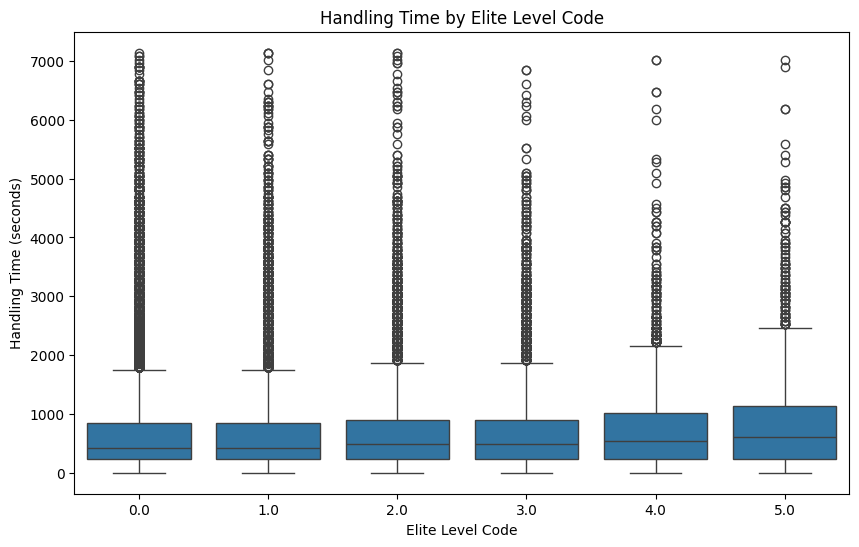

In [ ]:
grouped = call_customer.groupby('elite_level_code')['handle_time'].describe()
print(grouped)

# You can also visualize the relationship using a boxplot
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting a boxplot to see distribution of handle_time for each elite_level_code
plt.figure(figsize=(10, 6))
sns.boxplot(x='elite_level_code', y='handle_time', data=call_customer)
plt.title("Handling Time by Elite Level Code")
plt.xlabel("Elite Level Code")
plt.ylabel("Handling Time (seconds)")
plt.show()

As elite level increases from 0 to 5, handling time also increases from 678s to 896 seconds, which seems reasonable at elite poeple would like their problem to be heard and solved nicely, so more time is reasonable.

Lets check if agent tone has any effect on customer elite level.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

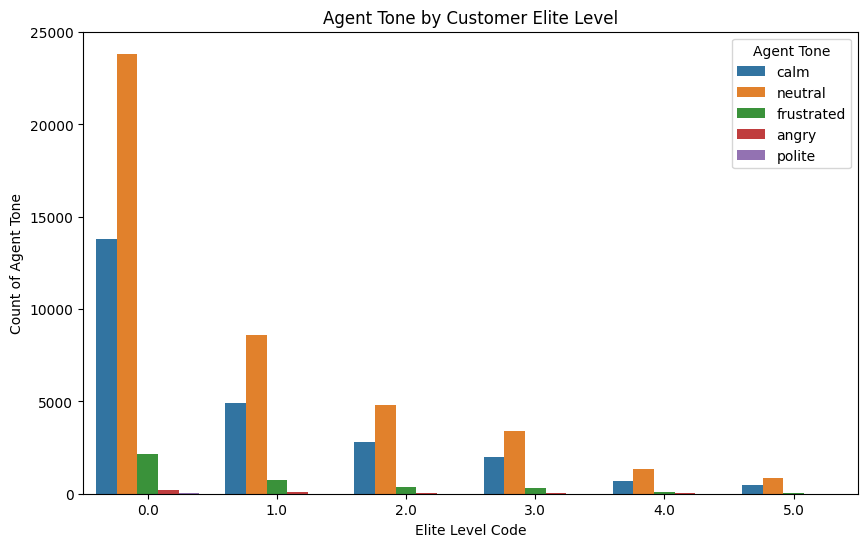

In [ ]:
merged_calls_sentiment = pd.merge(calls, sentiment, on='call_id')

merged_df = pd.merge(merged_calls_sentiment, customers, on='customer_id')

grouped_data = merged_df.groupby(['elite_level_code', 'agent_tone']).size().reset_index(name='count')

#Visualize using a count plot to see the relationship between agent tone and elite level
plt.figure(figsize=(10, 6))
sns.countplot(x='elite_level_code', hue='agent_tone', data=merged_df)
plt.title("Agent Tone by Customer Elite Level")
plt.xlabel("Elite Level Code")
plt.ylabel("Count of Agent Tone")
plt.legend(title="Agent Tone")
plt.show()

Most used tones by agents is neutral and calm, which is same towards all customers irrespective of elite levels.

In [ ]:
grouped_data = merged_df.groupby(['agent_tone', 'elite_level_code']).agg(
    average_handle_time=('handle_time', 'mean'),
    average_speed_to_answer=('waiting_time', 'mean')
).reset_index()

print(grouped_data)

    agent_tone  elite_level_code  average_handle_time  average_speed_to_answer
0        angry               0.0           396.792453               429.056604
1        angry               1.0           357.692308               432.307692
2        angry               2.0           474.666667               392.000000
3        angry               3.0           384.705882               423.529412
4        angry               4.0           420.000000               404.000000
5        angry               5.0           132.000000               516.000000
6         calm               0.0           607.811321               448.741655
7         calm               1.0           621.567271               445.768370
8         calm               2.0           651.075612               440.383387
9         calm               3.0           659.819820               426.786787
10        calm               4.0           698.303571               409.821429
11        calm               5.0           823.87878

It is observed that when agent talks politely, average handling time is minimum. This also increase customer experience, which we can see in call sentiment below.

In [ ]:
sentiment_grouped_data = merged_df.groupby(['agent_tone']).agg(
    average_handle_time=('handle_time', 'mean'),
    average_speed_to_answer=('waiting_time', 'mean'),
    average_sentiment=('average_sentiment', 'mean')  # Average sentiment score
).reset_index()

print(sentiment_grouped_data)

   agent_tone  average_handle_time  average_speed_to_answer  average_sentiment
0       angry           394.395887               425.089974          -0.616478
1        calm           626.499696               443.528267           0.101289
2  frustrated           617.068404               424.397394          -0.329978
3     neutral           750.276439               434.443613          -0.080355
4      polite           220.000000               461.379310           0.673793


Average sentiment was positive during 67% time during the call when agent tone was polite, and 10% when agent tone was calm, as compared to 61% and 32% negative if agent tone is angry and frustrated, resp. Even neutral agent tones generally tends the sentiment of call toward 8% negative.

Positive sentiment increase experience for United Airlines Customer. Therefore, agents must be trained to have positive and calm tones.

Following is the list of agents that need to polish their tones, and maintain calm even if customer is a little frustrated, because customer is calling only because he is in problem.

In [ ]:
# Group by agent_id and find the mode (most frequent tone) for each agent
mode_tones = sentiment.groupby('agent_id')['agent_tone'].agg(lambda x: x.mode()[0])

# Filter for agents whose mode tone is angry, frustrated, or neutral
negative_tones = ['angry', 'frustrated', 'neutral']
agents_needing_improvement = mode_tones[mode_tones.isin(negative_tones)]

# Save the results to a CSV file
agents_needing_improvement.to_csv('agents_needing_improvement.csv', header=True)

# Display the filtered agents
print(agents_needing_improvement)

agent_id
103651    neutral
106000    neutral
107876    neutral
112609    neutral
113217    neutral
           ...   
981776    neutral
981779    neutral
982131    neutral
992521    neutral
993862    neutral
Name: agent_tone, Length: 361, dtype: object


In [ ]:
# Define your threshold for negative tones
threshold = 5  # Example threshold; adjust as needed

# Count occurrences of each agent's tones in the sentiment DataFrame
tone_counts = sentiment_df.groupby('agent_id')['agent_tone'].value_counts().unstack(fill_value=0)

# Filter for agents with high counts of negative tones
negative_tones = ['angry', 'frustrated', 'neutral']
agents_needing_improvement = tone_counts.loc[tone_counts[negative_tones].sum(axis=1) > threshold]

# Save the results to a CSV file
agents_needing_improvement.to_csv('agents_needing_improvement.csv')


                         average_sentiment  handle_time  \
average_sentiment                 1.000000    -0.076065   
handle_time                      -0.076065     1.000000   
silence_percent_average           0.035339     0.406883   

                         silence_percent_average  
average_sentiment                       0.035339  
handle_time                             0.406883  
silence_percent_average                 1.000000  


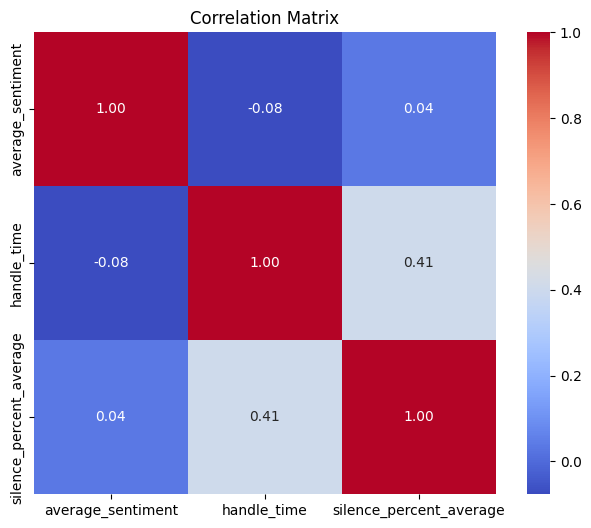

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

call_sentiment = merge_dataframes(calls, sentiment, on='call_id')
analysis_df = call_sentiment[['average_sentiment', 'handle_time', 'silence_percent_average']]
correlation_matrix = analysis_df.corr()
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

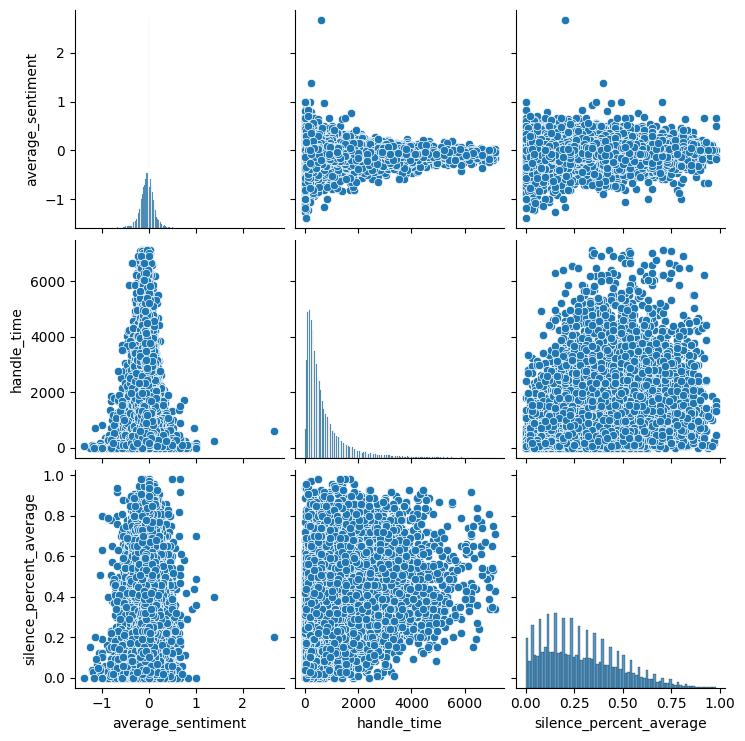

In [ ]:
# Optional: Scatter plots for pairwise relationships
sns.pairplot(analysis_df)
plt.show()

This only suggests correlation between handle time and silence percent, and that the call sentiment tends to be negative as handle time increases, which is anyway logical.